In [12]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
import matplotlib.animation as animation
from scipy.special import gamma, factorial

In [31]:
def run_mcmc():
        ### parameters ###
    a_beta = 0.35
    b_beta = 0.65
    burnin = 10 # number of burn-in iterations
    lag = 1  # iterations between successive samples
    nsamp = 100000 # number of samples to draw
    sig = 1 # standard deviation of Gaussian proposal
    x = -1 # start point
    ### storage ###
    X = np.zeros((nsamp,1)) # samples drawn from the Markov chain
    acc = np.array((0, 0))  # vector to track the acceptance rate


    def MHstep(x0,sig, a_beta, b_beta):
        #xp = np.random.normal(loc = x0, scale = sig)[0]  # generate candidate from Gaussian
        xp = np.random.normal(size=1)[0]
        accprob = targetdist(xp, a_beta, b_beta) / targetdist(x0, a_beta, b_beta) # acceptance probability
        u = np.random.rand() # uniform random number
        if u <= accprob: # if accepted
            x1 = xp # new point is the candidate
            a = 1 # note the acceptance
        else: # if rejected
            x1 = x0 # new point is the same as the old one
            a = 0 # note the rejection
        return x1, a
    
    def targetdist(x, a_beta, b_beta): # target distribution
        return (( (x**(a_beta-1)) * ((1-x)**(b_beta-1)) ) / B(a_beta, b_beta)) + 7

    def B(a_beta, b_beta):
        return (gamma(a_beta)*gamma(b_beta)) / gamma(a_beta+b_beta)


    # MH routine
    for i in range(burnin):
        x,a = MHstep(x,sig, a_beta, b_beta); # iterate chain one time step
        acc = acc + np.array((a, 1)) # track accept-reject status

    for i in range(nsamp):
        for j in range(lag):
            x,a = MHstep(x,sig, a_beta, b_beta) # iterate chain one time step
            acc = acc + np.array((a, 1)) # track accept-reject status
        X[i] = x # store the i-th sample
    df = pd.DataFrame(data=X, columns = ['Trace'])
    
    fig, axs = plt.subplots(2, 1)

    axs[0].hist(df.values, bins=20)
    axs[1].plot(df)

    r = Affine2D().rotate_deg(90)

    fig = plt.gcf()
    fig.set_size_inches(8, 6)


    for x in axs[1].images + axs[1].lines + axs[1].collections:
        trans = x.get_transform()
        x.set_transform(r+trans)
        if isinstance(x, PathCollection):
            transoff = x.get_offset_transform()
            x._transOffset = r+transoff

    old = axs[1].axis()
    axs[1].axis(old[2:4] + old[0:2])

    plt.show()

<ipython-input-31-1ac12c12776c>:29: RuntimeWarning: invalid value encountered in double_scalars
  return (( (x**(a_beta-1)) * ((1-x)**(b_beta-1)) ) / B(a_beta, b_beta)) + 7


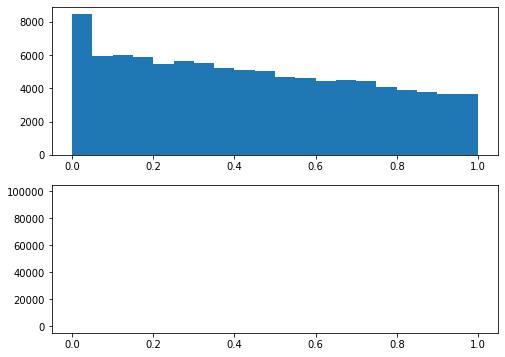

In [32]:
run_mcmc()